In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [12]:
# use the concept of multicollinearity and remove insignificant variables
# use a different method of scaling the numerical variables
# use a different ratio of train test split
# use the transformation on numerical columns which align it more towards a normal distribution

In [13]:
# import data
file1 = pd.read_csv("marketing_customer_analysis.csv")
file1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
# use the concept of multicollinearity and remove insignificant variables

file1num = file1.select_dtypes([np.number])
file1num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [15]:
file1num = file1.select_dtypes([np.number])
file1num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [16]:
num_matrix = file1num.corr()
num_matrix = round(num_matrix, 2)
num_matrix  

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
Income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
Monthly Premium Auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
Months Since Last Claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
Months Since Policy Inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
Number of Open Complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
Number of Policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
Total Claim Amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


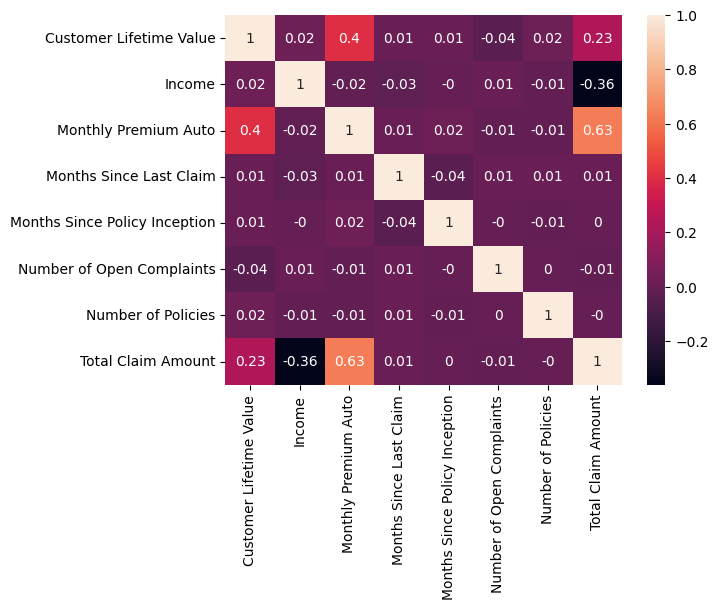

In [17]:
sns_plot = sns.heatmap(num_matrix, annot=True) 
sns_plot 

plt.show() #there is no high correlation between the observed columns

In [27]:
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)


                         feature       VIF
0        Customer Lifetime Value  1.941465
1                         Income  1.061404
2           Monthly Premium Auto  2.003299
3        Months Since Last Claim  1.011288
4  Months Since Policy Inception  1.008117
5      Number of Open Complaints  1.007967
6             Number of Policies  1.004470


In [19]:
# use a different method of scaling the numerical variables
#normalize the data ; scale the data
y = num_matrix['Total Claim Amount'] # variable we want to know
X = num_matrix.drop(['Total Claim Amount'], axis=1) # other variables
X.head()




,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
Customer Lifetime Value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02
Income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01
Monthly Premium Auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01
Months Since Last Claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01
Months Since Policy Inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01


In [23]:
# https://inria.github.io/scikit-learn-mooc/python_scripts/02_numerical_pipeline_scaling.html

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(file1num)

StandardScaler()

In [24]:
file1num_scaled = scaler.transform(file1num)
file1num_scaled

array([[-0.76287773,  0.61282744, -0.70392465, ..., -0.42224956,
        -0.82264788, -0.16963969],
       [-0.14924546, -1.23961684,  0.02269103, ..., -0.42224956,
         2.10615996,  2.400737  ],
       [ 0.71063622,  0.36570978,  0.42959581, ..., -0.42224956,
        -0.40424676,  0.45573376],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ...,  2.87324529,
        -0.40424676,  1.22793667],
       [-0.06993547, -0.51735647,  0.08082028, ..., -0.42224956,
         0.01415436,  0.88511256],
       [-0.78495478, -1.23961684, -0.47140763, ..., -0.42224956,
        -0.82264788, -0.22200449]])